# NBA Players Analysis

In this notebook I'll look into a dataset describing the seasonal stats of the NBA Players, uploaded to Kaggle by Omri Goldstein. The Original dataset contaions data since 1950,However I'll address data since 1980 only, due to this year's importance in the NBA History (for example, the 3-Point line was first used in this season, some players' statistics were recorded only since this year, and more).
This dataset is not up-to-date (last season stats is 2017), but I've found it very rich and yet approachable, and it allowed me to practice important concepts.

In [69]:
import pandas as pd
from pandasql import sqldf
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None

# Dataset Preperation

In [70]:
# First, let's take a look on how the dataset looks like:

pd.read_csv("NBA Players Seasons Stats.csv")

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24688,24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
24689,24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


In [71]:
pd.read_csv("NBA Players Seasons Stats.csv").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24691 entries, 0 to 24690
Data columns (total 53 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  24691 non-null  int64  
 1   Year        24624 non-null  float64
 2   Player      24624 non-null  object 
 3   Pos         24624 non-null  object 
 4   Age         24616 non-null  float64
 5   Tm          24624 non-null  object 
 6   G           24624 non-null  float64
 7   GS          18233 non-null  float64
 8   MP          24138 non-null  float64
 9   PER         24101 non-null  float64
 10  TS%         24538 non-null  float64
 11  3PAr        18839 non-null  float64
 12  FTr         24525 non-null  float64
 13  ORB%        20792 non-null  float64
 14  DRB%        20792 non-null  float64
 15  TRB%        21571 non-null  float64
 16  AST%        22555 non-null  float64
 17  STL%        20792 non-null  float64
 18  BLK%        20792 non-null  float64
 19  TOV%        19582 non-nul

In [72]:
# To start my data preperation, I want to get rid of the two "blank" columns (0 non-null values). 
#I will also drop the "Unnamed" column and use the default index.
players_season_stats = (pd.read_csv("NBA Players Seasons Stats.csv")
                          .drop(axis = 1, columns = ["blanl", "blank2", "Unnamed: 0"]))
players_season_stats

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,0.604,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,0.508,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,0.346,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,0.503,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


In [73]:
# Get rid of null rows as well

find_nulls = players_season_stats.isnull()
players_season_stats[find_nulls]

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
# I'll drop only complete null rows.

players_season_stats = players_season_stats.dropna(how = 'all')

In [75]:
# In addition, I'll convert some repetative columns to category type in order to save some capacity. 
# Let's check which columns fit with nunique:
players_season_stats.nunique()

Year        68
Player    3921
Pos         23
Age         27
Tm          69
G           88
GS          84
MP        3329
PER        557
TS%        618
3PAr       779
FTr        936
ORB%       310
DRB%       408
TRB%       320
AST%       515
STL%       114
BLK%       129
TOV%       408
USG%       404
OWS        193
DWS        106
WS         227
WS/48      821
OBPM       371
DBPM       239
BPM        439
VORP       126
FG         905
FGA       1725
FG%        515
3P         240
3PA        553
3P%        415
2P         889
2PA       1655
2P%        508
eFG%       531
FT         650
FTA        806
FT%        646
ORB        382
DRB        771
TRB       1148
AST        790
STL        240
BLK        284
TOV        342
PF         359
PTS       2117
dtype: int64

In [76]:
# Convert Position, Age & Tm - the most repetitive:

players_season_stats["Pos"] = players_season_stats["Pos"].astype("category")
players_season_stats["Age"] = players_season_stats["Age"].astype("category")
players_season_stats["Tm"] = players_season_stats["Tm"].astype("category")

In [77]:
# Also, I'd like to change columns containing only round number (Such as Year, PTS) to integers:
players_season_stats["Year"] = players_season_stats["Year"].astype("int")
players_season_stats["G"] = players_season_stats["G"].astype("int")
players_season_stats["FG"] = players_season_stats["FG"].astype("int")
players_season_stats["FGA"] = players_season_stats["FGA"].astype("int")
players_season_stats["3P"] = players_season_stats["3P"].astype("int")
players_season_stats["3PA"] = players_season_stats["3PA"].astype("int")
players_season_stats["2P"] = players_season_stats["2P"].astype("int")
players_season_stats["2PA"] = players_season_stats["2PA"].astype("int")
players_season_stats["FT"] = players_season_stats["FT"].astype("int")
players_season_stats["FTA"] = players_season_stats["FTA"].astype("int")
players_season_stats["ORB"] = players_season_stats["ORB"].astype("int")
players_season_stats["DRB"] = players_season_stats["DRB"].astype("int")
players_season_stats["TRB"] = players_season_stats["TRB"].astype("int")
players_season_stats["AST"] = players_season_stats["AST"].astype("int")
players_season_stats["STL"] = players_season_stats["STL"].astype("int")
players_season_stats["BLK"] = players_season_stats["BLK"].astype("int")
players_season_stats["TOV"] = players_season_stats["TOV"].astype("int")
players_season_stats["PF"] = players_season_stats["PF"].astype("int")
players_season_stats["PTS"] = players_season_stats["PTS"].astype("int")

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [ ]:
players_season_stats.info()

In [78]:
# In addition, I would like to address smaller Player Position set than described below:
# I'l address the "main" position of each player.
players_season_stats["Pos"].value_counts()

PF       4966
SG       4811
C        4759
SF       4699
PG       4648
G         139
F         123
F-C        81
G-F        79
F-G        60
C-F        35
C-PF       33
SF-SG      30
PG-SG      28
SG-PG      27
PF-C       27
SG-SF      26
PF-SF      25
SF-PF      21
SG-PF       3
C-SF        2
SF-PG       1
PG-SF       1
Name: Pos, dtype: int64

In [79]:
# In order to do that, I'll create a function that will address only the 'main' position of the player,
# the first part of the "Pos" string: for example, "C-F" will become a "C". on the other hand, "F-C" will become "F".

def pos_conv(position):
    if len(position) >= 3:              # For both single-lettered and double-lettered position ('C' vs. 'PF'),
        return position.split("-")[0]   # indicates there's more than position defined as the player's position.
    return position

position_example = "C-PF" # Expected output: "C"

position_changed = pos_conv(position_example)
position_changed

'C'

In [80]:
# And use Pandas 'apply' to apply to all "Pos" column:
players_season_stats["Pos"] = players_season_stats["Pos"].apply(pos_conv)

# In the future it will be easier to address any comparisons between Player's position stats.
players_season_stats["Pos"].value_counts()

PF    5018
SG    4867
C     4829
SF    4751
PG    4677
F      264
G      218
Name: Pos, dtype: int64

In [81]:
# The last preperation I'd like to make to this dataset is to cut the data from 1980 and forward.

years = players_season_stats["Year"] >= 1980
players_season_stats = players_season_stats[years]
players_season_stats.reset_index(inplace = True)  # Since we have different number of rows now

In [82]:
players_season_stats

,index,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,5727,1980,Kareem Abdul-Jabbar*,C,32.0,LAL,82,NaN,3143.0,25.3,...,0.765,190.0,696.0,886.0,371.0,81.0,280.0,297.0,216.0,2034.0
1,5728,1980,Tom Abernethy,PF,25.0,GSW,67,NaN,1222.0,11.0,...,0.683,62.0,129.0,191.0,87.0,35.0,12.0,39.0,118.0,362.0
2,5729,1980,Alvan Adams,C,25.0,PHO,75,NaN,2168.0,19.2,...,0.797,158.0,451.0,609.0,322.0,108.0,55.0,218.0,237.0,1118.0
3,5730,1980,Tiny Archibald*,PG,31.0,BOS,80,80.0,2864.0,15.3,...,0.830,59.0,138.0,197.0,671.0,106.0,10.0,242.0,218.0,1131.0
4,5731,1980,Dennis Awtrey,C,31.0,CHI,26,NaN,560.0,7.4,...,0.640,29.0,86.0,115.0,40.0,12.0,15.0,27.0,66.0,86.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18922,24686,2017,Cody Zeller,PF,24.0,CHO,62,58.0,1725.0,16.7,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
18923,24687,2017,Tyler Zeller,C,27.0,BOS,51,5.0,525.0,13.0,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
18924,24688,2017,Stephen Zimmerman,C,20.0,ORL,19,0.0,108.0,7.3,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
18925,24689,2017,Paul Zipser,SF,22.0,CHI,44,18.0,843.0,6.9,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


Last thing before analyzing the dataset, there's an important question we need to figure out: what is the granullarity level
of this data set? In other words, what does a row in this data set describe?

For example: Each row in the dataset describe a player's season stats, yet it includes a "Tm" (Team) column. What happens if a
Player played for a more than 1 team in a season? Do we get 2 rows, or a signle row with one of the teams the player played for?

In [83]:
# This is a question I can easily answer using info knowledge I have on players who were traded during a season. 
# For instance, let's look at Omri Casspi's data:

casspi = """
        SELECT
              Player
            , Tm
            , Year
        FROM players_season_stats
        WHERE 1=1
            AND LOWER(Player) LIKE "%casspi"
        ;
        """
casspi_df = sqldf(casspi)
casspi_df

,Player,Tm,Year
0,Omri Casspi,SAC,2010
1,Omri Casspi,SAC,2011
2,Omri Casspi,CLE,2012
3,Omri Casspi,CLE,2013
4,Omri Casspi,HOU,2014
5,Omri Casspi,SAC,2015
6,Omri Casspi,SAC,2016
7,Omri Casspi,TOT,2017
8,Omri Casspi,SAC,2017
9,Omri Casspi,NOP,2017


Poor Omri Casspi was traded 4 times during 2017 Season, and he has 4 rows describing this season - 1 for each team.
It is clear that the granullarity level is a row per player, season and team.
We can start analyzing the dataset.

# Insight #1 - Teams In Career Distrbution

Seeing Omri Casspi's list of teams he played for in his NBA career brought an intersting question to my mind:
Do NBA players tend to spend their career in a small amount of teams, or do they travel a lot? Does it depend on other factors?
First thing I'd like to check out is the histogram of number of players playing for any number of teams in thier careers.

In [84]:
# Using the sqldf library (and a short SQL query) I can easily access the data prociding the asnwer to this question:

histogram_query = """
        WITH total_seasons_teams AS
        (
        SELECT
              Player
            , COUNT(DISTINCT Tm) total_teams_in_career
        FROM players_season_stats
        GROUP BY 1
        )

        SELECT
              total_teams_in_career
            , COUNT(DISTINCT Player) number_of_players
        FROM total_seasons_teams
        GROUP BY 1
        HAVING total_teams_in_career != 0
        ;
        """

histo_df = sqldf(histogram_query)
histo_df

,total_teams_in_career,number_of_players
0,1,921
1,2,398
2,3,389
3,4,311
4,5,292
5,6,196
6,7,147
7,8,92
8,9,44
9,10,28


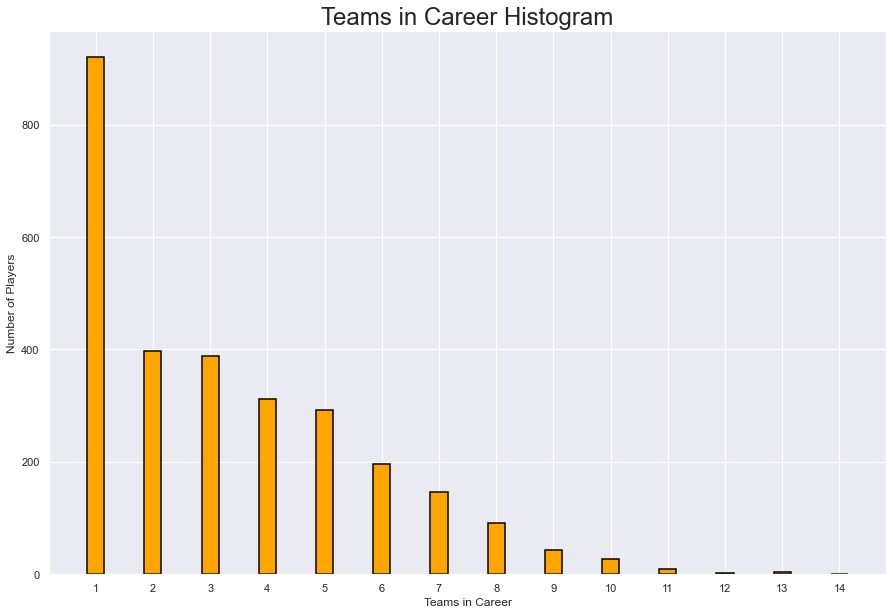

In [85]:
sns.set(rc={'figure.figsize':(15,10)})
teams_hist = plt.bar(histo_df["total_teams_in_career"], histo_df["number_of_players"], width = 0.3, 
                     color = "orange", edgecolor = 'black', linewidth = 1.5)
teams_hist = plt.xlabel("Teams in Career")
teams_hist = plt.xticks(histo_df["total_teams_in_career"])
teams_hist = plt.ylabel("Number of Players")
plt.title("Teams in Career Histogram", {'fontsize':24})
plt.show()

However, this doesn't make any sense to me. Even though some player do spend their entier career in one team - From what I know about the NBA, it is not that common, so the distribution shouldn't look like that.

My hypothesis is that this distribution is affected by the data of players who spent a very short time in the NBA. Therefore is seems like most of the NBA Players play only for team during their career, but in my opition not everyone who played a few games in the league is really an NBA player.

In [86]:
# Therefore, I'll create this histogram again, this time addressing only players who played at least 2 seasons in the NBA.

histogram_query = """
        WITH total_seasons_teams AS
        (
        SELECT
              Player
            , COUNT(DISTINCT Year) total_seasons
            , COUNT(DISTINCT Tm) total_teams_in_career
        FROM players_season_stats
        GROUP BY 1
        )

        SELECT
              total_teams_in_career
            , COUNT(DISTINCT Player) number_of_players
        FROM total_seasons_teams
        WHERE total_seasons > 1
        GROUP BY 1
        ;
        """

histo_df = sqldf(histogram_query)
histo_df

,total_teams_in_career,number_of_players
0,1,328
1,2,397
2,3,321
3,4,306
4,5,292
5,6,196
6,7,147
7,8,92
8,9,44
9,10,28


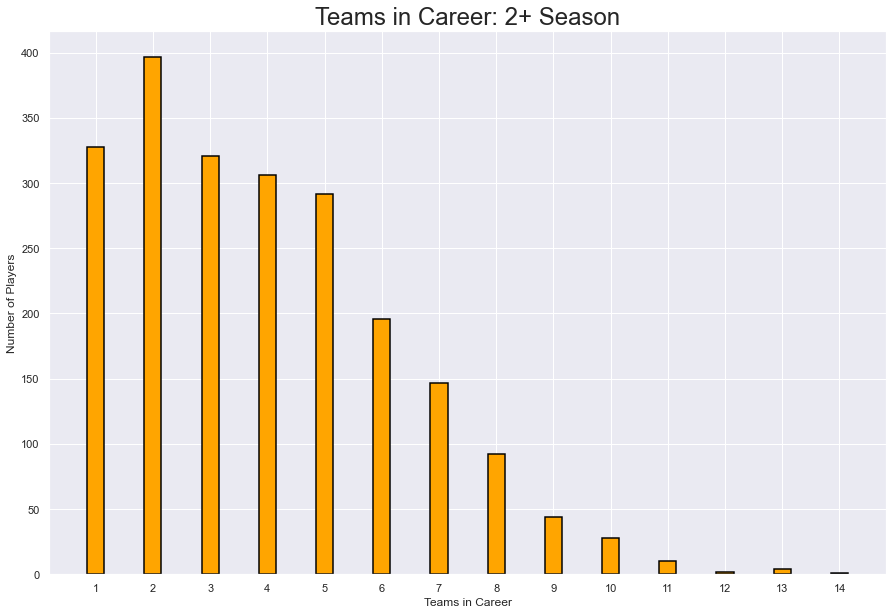

In [87]:
sns.set(rc={'figure.figsize':(15,10)})
teams_hist = plt.bar(histo_df["total_teams_in_career"], histo_df["number_of_players"], width = 0.3, 
                     color = "orange", edgecolor = 'black', linewidth = 1.5)
teams_hist = plt.xlabel("Teams in Career")
teams_hist = plt.xticks(histo_df["total_teams_in_career"])
teams_hist = plt.ylabel("Number of Players")
plt.title("Teams in Career: 2+ Season", {'fontsize':24})
plt.show()